# SIR Modelling 

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)




In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_dataset.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,US,Germany,Australia,United Kingdom
231,2020-09-09,4465863,6360212,256433,26524,357613
232,2020-09-10,4562414,6396100,258149,26564,360544
233,2020-09-11,4659984,6443652,259735,26607,364088
234,2020-09-12,4754356,6485123,260817,26651,367592
235,2020-09-13,4754356,6519573,261737,26692,370930


In [3]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=3000000 #max susceptible population
beta=0.7   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.India[70]
S0=N0-I0
R0=0

In [4]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


# Simulative approach to calculate SIR curves

In [5]:
np.array([S0,I0,R0])

array([2998002,    1998,       0])

In [6]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)



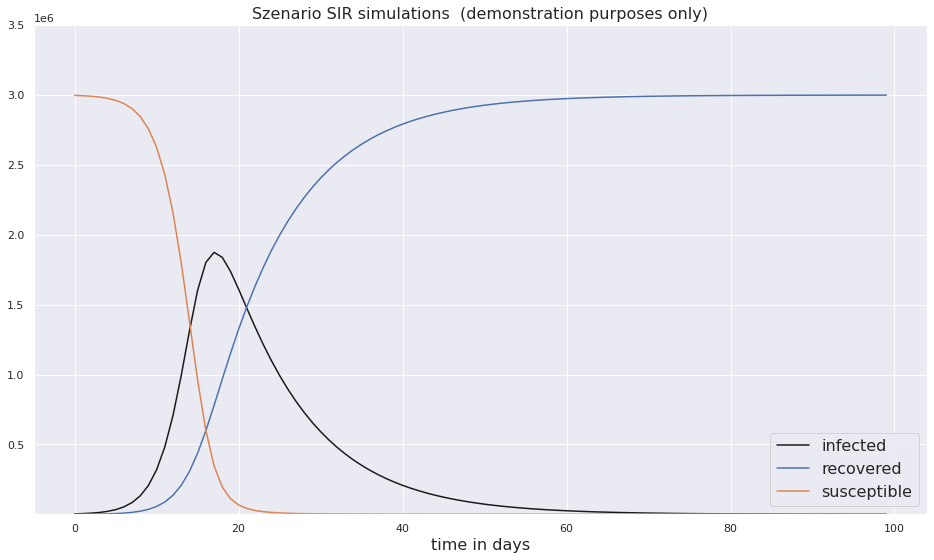

In [7]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 3500000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [8]:
ydata = np.array(df_analyse.India[75:])
t=np.arange(len(ydata))
len(t)

161

In [9]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
I0

4778

In [10]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [11]:


def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [12]:
# example curve of our differential equationa
popt=[0.5,0.2]
fit_odeint(t, *popt)

array([4.77800000e+03, 6.44307316e+03, 8.68371737e+03, 1.16950729e+04,
       1.57353432e+04, 2.11436734e+04, 2.83610609e+04, 3.79530390e+04,
       5.06309748e+04, 6.72656246e+04, 8.88817404e+04, 1.16616186e+05,
       1.51615771e+05, 1.94849172e+05, 2.46818032e+05, 3.07185727e+05,
       3.74402578e+05, 4.45476190e+05, 5.16066077e+05, 5.81011728e+05,
       6.35222010e+05, 6.74651909e+05, 6.97017839e+05, 7.02024092e+05,
       6.91104131e+05, 6.66863350e+05, 6.32456657e+05, 5.91070041e+05,
       5.45576558e+05, 4.98361489e+05, 4.51274725e+05, 4.05662154e+05,
       3.62436584e+05, 3.22161527e+05, 2.85132339e+05, 2.51447241e+05,
       2.21065664e+05, 1.93854096e+05, 1.69620884e+05, 1.48141861e+05,
       1.29178685e+05, 1.12491555e+05, 9.78476884e+04, 8.50266823e+04,
       7.38236192e+04, 6.40505807e+04, 5.55370619e+04, 4.81296538e+04,
       4.16912556e+04, 3.61000102e+04, 3.12480933e+04, 2.70404503e+04,
       2.33935421e+04, 2.02341387e+04, 1.74981861e+04, 1.51297587e+04,
      

In [13]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma
fit_odeint

<function __main__.fit_odeint(x, beta, gamma)>

In [14]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



standard deviation errors :  [0.00032199 0.00018564]  start infect: 4778
Optimal parameters: beta = 0.04403147656175833  and gamma =  -0.010342343440389003


<ipython-input-10-16f200073f8a>:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
<ipython-input-10-16f200073f8a>:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I


In [15]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

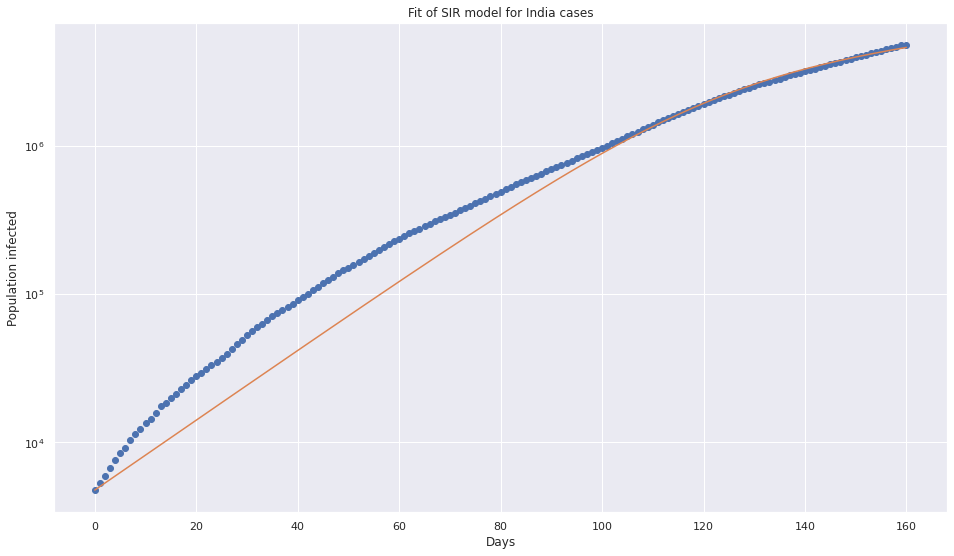

Optimal parameters: beta = 0.04403147656175833  and gamma =  -0.010342343440389003
Basic Reproduction Number R0  -4.2573984141549825
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [16]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for India cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dynamic beta in SIR (infection rate)

In [17]:
t_initial=100
t_intro_measures=24
t_hold=21
t_relax=21

beta_max=0.085
beta_min=0.04
gamma=0.02
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))




In [18]:
pd_beta

array([0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085  

In [19]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})
propagation_rates

,susceptible,infected,recovered


In [20]:
for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)
propagation_rates.tail()

,susceptible,infected,recovered
161,471634.041721,769170.184495,1.759196e+06
162,462171.873236,763248.949290,1.774579e+06
163,452706.355959,757449.487581,1.789844e+06
164,443247.970349,751758.883440,1.804993e+06
165,433806.861703,746164.814417,1.820028e+06


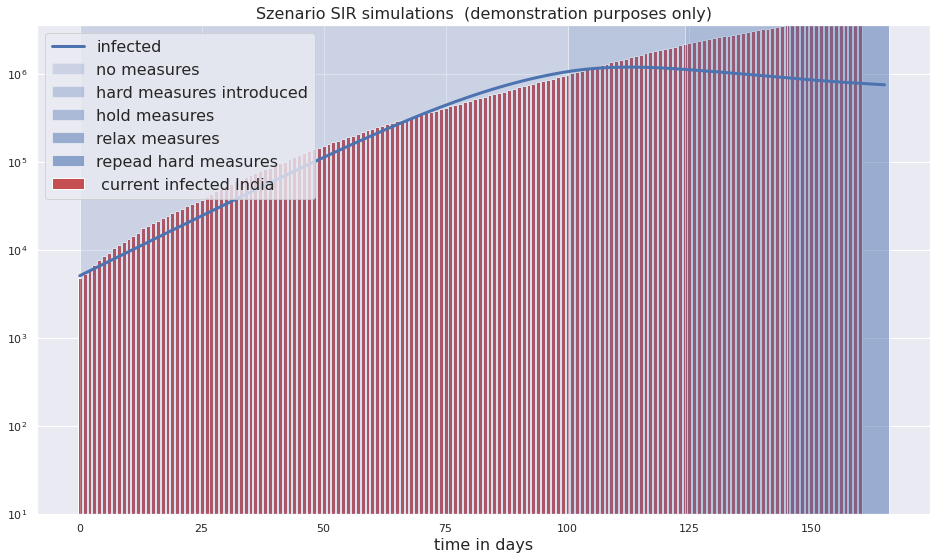

In [21]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected India',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 3*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});